## colab에 설치된 프로그램 버전 확인

In [1]:
import tensorflow as tf

# Check Tensorfolw version!
print("Tensorflow ", tf.__version__)
# Check Python version!
!python --version

Tensorflow  2.13.0
Python 3.10.12


## python을 사용하여 cost function(비용함수) 구현

In [3]:
import numpy as np

X = np.array([1, 2, 3])
Y = np.array([1, 2, 3])  # 입력 데이터 정의

def cost_func(W, X, Y):
  cost = 0
  for i in range(len(X)):
    cost = cost + (W * X[i] - Y[i]) ** 2
  return cost/ len(X)

for feed_W in np.linspace(0, 2, num=3):
  cur_cost = cost_func(feed_W, X, Y)
  print("W = {}.... Cost ={}".format(feed_W, cur_cost))



W = 0.0.... Cost =4.666666666666667
W = 1.0.... Cost =0.0
W = 2.0.... Cost =4.666666666666667


## tensorflow을 사용하여 cost function(비용함수) 구현

In [5]:
X = np.array([1, 2, 3])
Y = np.array([1, 2, 3])

def cost_func(W, X, Y):
  hypothesis = X * W
  return tf.reduce_mean(tf.square(hypothesis - Y))


W_values = np.linspace(-2, 4, num=100)
cost_values = []

for feed_W in W_values:
    curr_cost = cost_func(feed_W, X, Y)
    cost_values.append(curr_cost)
   #print("cost_values = ", cost_values)
    print("{:6.3f} | {:10.5f}".format(feed_W, curr_cost))

print("Weight Values={} \nCost Values= {}". format(W_values, cost_values))

-2.000 |   42.00000
-1.939 |   40.32017
-1.879 |   38.67463
-1.818 |   37.06336
-1.758 |   35.48638
-1.697 |   33.94368
-1.636 |   32.43526
-1.576 |   30.96113
-1.515 |   29.52127
-1.455 |   28.11570
-1.394 |   26.74441
-1.333 |   25.40741
-1.273 |   24.10468
-1.212 |   22.83624
-1.152 |   21.60208
-1.091 |   20.40220
-1.030 |   19.23661
-0.970 |   18.10530
-0.909 |   17.00826
-0.848 |   15.94552
-0.788 |   14.91705
-0.727 |   13.92287
-0.667 |   12.96296
-0.606 |   12.03734
-0.545 |   11.14601
-0.485 |   10.28895
-0.424 |    9.46618
-0.364 |    8.67769
-0.303 |    7.92348
-0.242 |    7.20355
-0.182 |    6.51791
-0.121 |    5.86654
-0.061 |    5.24946
 0.000 |    4.66667
 0.061 |    4.11815
 0.121 |    3.60392
 0.182 |    3.12397
 0.242 |    2.67830
 0.303 |    2.26691
 0.364 |    1.88981
 0.424 |    1.54699
 0.485 |    1.23845
 0.545 |    0.96419
 0.606 |    0.72421
 0.667 |    0.51852
 0.727 |    0.34711
 0.788 |    0.20998
 0.848 |    0.10713
 0.909 |    0.03857
 0.970 |    0.00429


## cost function 그래프

# 실습과제

 입력 데이터 5개를 사용한 cost 함수 그래프 작성
 화면 캡처로 제출

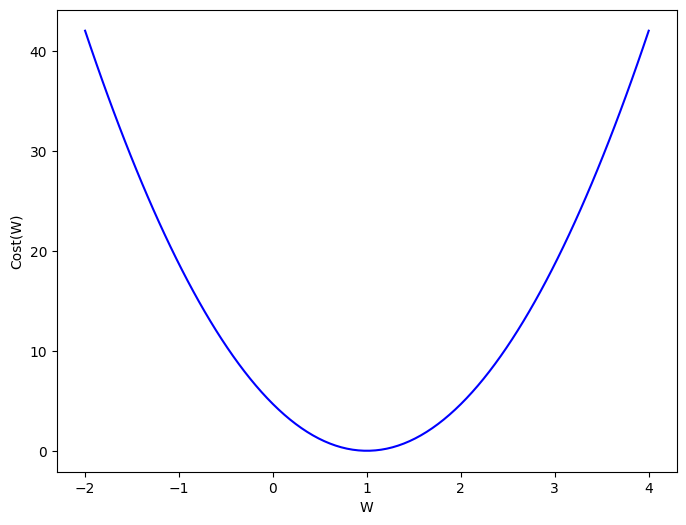

In [6]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (8,6)

plt.plot(W_values, cost_values, "b")
plt.ylabel('Cost(W)')
plt.xlabel('W')
plt.show()

## Gradient Descent Algorithm

In [10]:
import tensorflow as tf

#X = [10., 9., 3., 2.]
#Y = [90., 80.,50., 60.]

X = [1., 2., 3., 4., 5.]
Y = [10., 20.,30., 40., 60.]

W = tf.Variable(tf.random.normal((1,), -10., 10.))

print("W = ", W)

for step in range(200):
    hypothesis = W * X
    cost = tf.reduce_mean(tf.square(hypothesis - Y))

    alpha = 0.01

    gradient = tf.reduce_mean(tf.multiply(tf.multiply(W, X) - Y, X))
    descent = W - tf.multiply(alpha, gradient)
    W.assign(descent)

    if step % 10 == 0:
      print('{:5} | {:10.4f} | {:10.6f}'.format(
            step, cost.numpy(), W.numpy()[0]))


W =  <tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([-5.487136], dtype=float32)>
    0 |  2968.1079 |  -3.683551
   10 |   298.4374 |   6.358854
   20 |    38.8654 |   9.490250
   30 |    13.6273 |  10.466671
   40 |    11.1734 |  10.771137
   50 |    10.9348 |  10.866075
   60 |    10.9116 |  10.895678
   70 |    10.9093 |  10.904908
   80 |    10.9091 |  10.907785
   90 |    10.9091 |  10.908684
  100 |    10.9091 |  10.908963
  110 |    10.9091 |  10.909051
  120 |    10.9091 |  10.909080
  130 |    10.9091 |  10.909087
  140 |    10.9091 |  10.909087
  150 |    10.9091 |  10.909087
  160 |    10.9091 |  10.909087
  170 |    10.9091 |  10.909087
  180 |    10.9091 |  10.909087
  190 |    10.9091 |  10.909087


## Gradient Descent Algorithm을 사용한 미래 값 예측

In [11]:
# predict

print("W = ", W)
print("W numpy = ", W.numpy()[0])
x = [6.]
H = W*x

print("H = ", H.numpy()[0])




W =  <tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([10.909087], dtype=float32)>
W numpy =  10.909087
H =  65.45452


In [12]:
X = [1., 2., 3., 4.]
Y = [1., 3., 5., 7.]

W = tf.Variable([5.0])

for step in range(300):
    hypothesis = W * X
    cost = tf.reduce_mean(tf.square(hypothesis - Y))

    alpha = 0.01
    gradient = tf.reduce_mean(tf.multiply(tf.multiply(W, X) - Y, X))
    descent = W - tf.multiply(alpha, gradient)
    W.assign(descent)

    if step % 10 == 0:
        print('{:5} | {:10.4f} | {:10.6f}'.format(
            step, cost.numpy(), W.numpy()[0]))


    0 |    83.5000 |   4.750000
   10 |    17.6915 |   3.080629
   20 |     3.8521 |   2.315085
   30 |     0.9417 |   1.964020
   40 |     0.3297 |   1.803027
   50 |     0.2009 |   1.729199
   60 |     0.1739 |   1.695343
   70 |     0.1682 |   1.679817
   80 |     0.1670 |   1.672697
   90 |     0.1667 |   1.669432
  100 |     0.1667 |   1.667935
  110 |     0.1667 |   1.667248
  120 |     0.1667 |   1.666933
  130 |     0.1667 |   1.666789
  140 |     0.1667 |   1.666723
  150 |     0.1667 |   1.666692
  160 |     0.1667 |   1.666678
  170 |     0.1667 |   1.666672
  180 |     0.1667 |   1.666669
  190 |     0.1667 |   1.666668
  200 |     0.1667 |   1.666667
  210 |     0.1667 |   1.666667
  220 |     0.1667 |   1.666667
  230 |     0.1667 |   1.666667
  240 |     0.1667 |   1.666667
  250 |     0.1667 |   1.666667
  260 |     0.1667 |   1.666667
  270 |     0.1667 |   1.666667
  280 |     0.1667 |   1.666667
  290 |     0.1667 |   1.666667
